In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcamJpdHRlcmxpY2hcZ2l0aHViXG5vdGVzX2FuZF9zb2x1dGlvbnNfcmVpbmZvcmNlbWVudF9sZWFybmluZw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp1252.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1728293208.0, "C:\\

In [2]:
from dataclasses import dataclass, field
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence, Tuple

In [3]:
# | code-fold: false
# the armed bandit
@dataclass
class ArmedBandit:
    """k-armed Gaussian bandit."""

    action_mu: np.ndarray  # mean reward of each arm
    action_sd: float  # standard deviation of reward noise
    seed: int | None = None
    rng: np.random.Generator = field(init=False)

    def __post_init__(self):
        self.action_mu = np.asarray(self.action_mu, dtype=np.float64).copy()
        self.rng = np.random.default_rng(self.seed)

    def pull_arm(self, action):
        # simulate pulling an arm and returning a reward based on a normal distribution
        return self.rng.normal(loc=self.action_mu[action], scale=self.action_sd)

In [4]:
# | code-fold: false
# the simple average bandit agent
class SampleAverageBanditAgent:
    def __init__(self, Q1, ε, seed=None):
        self.rng = np.random.default_rng(seed)
        self.num_actions = len(Q1) 
        self.Q1 = np.asarray(Q1, dtype=np.float64)  # initial action-value estimates
        self.ε = ε  
        self.reset()

    def reset(self):
        self.Q = self.Q1.copy()
        self.counts = np.zeros(self.num_actions, dtype=int)

    def act(self, bandit):
        # ε-greedy action selection
        if self.rng.random() < self.ε:
            action = self.rng.integers(self.num_actions)
        else:
            action = np.argmax(self.Q)

        # take action and observe the reward
        reward = bandit.pull_arm(action)

        # update count and value estimate
        self.counts[action] += 1
        α = 1 / self.counts[action]
        self.Q[action] += α * (reward - self.Q[action])

        return (action, reward)

In [5]:
# the core bandit experiment


# ── core experiment ───────────────────────────────────────────────────────────
def bandit_experiment(
    agents: Sequence,
    *,
    bandit_setup_mu: float = 0.0,
    bandit_setup_sd: float = 1.0,
    bandit_action_sd: float = 1.0,
    bandit_value_drift: bool = False,
    bandit_value_drift_mu: float = 0.0,
    bandit_value_drift_sd: float = 0.0,
    bandit_num_arms: int = 10,
    exp_steps: int = 1_000,
    exp_runs: int = 200,
    exp_seed: int | None = None,
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Run `exp_runs` × `exp_steps` episodes and return:

    average_rewards         shape = (len(agents), exp_steps)
    optimal_action_percent  shape = (len(agents), exp_steps)
    """
    rng = np.random.default_rng(exp_seed)
    num_agents = len(agents)
    average_rwds = np.zeros((num_agents, exp_steps))
    optimal_acts = np.zeros((num_agents, exp_steps))

    # --- allocate a single bandit and reuse its object shell ---------------
    bandit = ArmedBandit(
        action_mu=np.empty(bandit_num_arms),  # placeholder
        action_sd=bandit_action_sd,
        seed=exp_seed,
    )

    for run in range(exp_runs):
        # fresh true values for this run
        bandit.action_mu[:] = rng.normal(
            bandit_setup_mu, bandit_setup_sd, size=bandit_num_arms
        )
        best_action = np.argmax(bandit.action_mu)

        # reset all agents
        for agent in agents:
            agent.reset()

        # vectorised drift noise: shape = (exp_steps, bandit_num_arms)
        if bandit_value_drift:
            drift_noise = rng.normal(
                bandit_value_drift_mu,
                bandit_value_drift_sd,
                size=(exp_steps, bandit_num_arms),
            )

        # ---- main loop -----------------------------------------------------
        for t in range(exp_steps):
            for i, agent in enumerate(agents):
                act, rwd = agent.act(bandit)
                average_rwds[i, t] += rwd
                optimal_acts[i, t] += act == best_action

            if bandit_value_drift:
                bandit.action_mu += drift_noise[t]
                best_action = np.argmax(bandit.action_mu)

    # mean over runs
    average_rwds /= exp_runs
    optimal_acts = 100 * optimal_acts / exp_runs
    return average_rwds, optimal_acts


# ── thin plotting helpers ──────────────────────────────────────────────────────
def plot_average_reward(
    average_rewards: np.ndarray,
    *,
    labels: Sequence[str] | None = None,
    ax: plt.Axes | None = None,
) -> plt.Axes:
    """One line per agent: average reward versus step."""
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 4))

    steps  = np.arange(1, average_rewards.shape[1] + 1)
    if labels is None:
        labels = [f"agent {i}" for i in range(average_rewards.shape[0])]

    for i, lbl in enumerate(labels):
        ax.plot(steps, average_rewards[i], label=lbl)

    ax.set_xlabel("Step")
    ax.set_ylabel("Average reward")
    ax.set_title("Average reward per step")
    ax.grid(alpha=0.3, linestyle=":")
    ax.legend()
    return ax


def plot_optimal_action_percent(
    optimal_action_percents: np.ndarray,
    *,
    labels: Sequence[str] | None = None,
    ax: plt.Axes | None = None,
) -> plt.Axes:
    """One line per agent: % optimal action versus step."""
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 4))

    steps  = np.arange(1, optimal_action_percents.shape[1] + 1)
    if labels is None:
        labels = [f"agent {i}" for i in range(optimal_action_percents.shape[0])]

    for i, lbl in enumerate(labels):
        ax.plot(steps, optimal_action_percents[i], label=lbl)

    ax.set_xlabel("Step")
    ax.set_ylabel("% optimal action")
    ax.set_title("Optimal-action frequency")
    ax.grid(alpha=0.3, linestyle=":")
    ax.legend()
    return ax

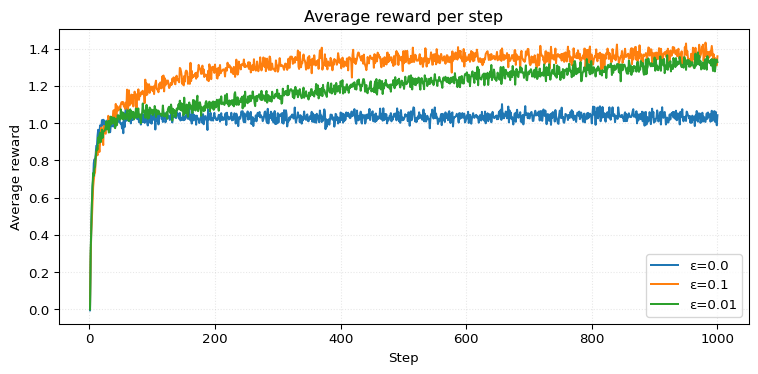

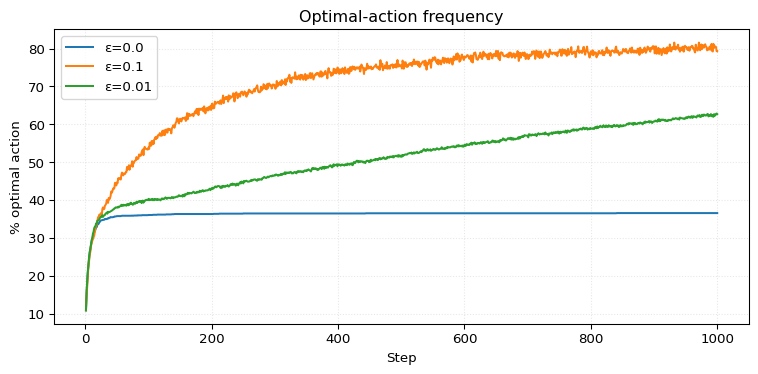

In [6]:
#| code-fold: false
#| label: fig-bandit-comparison-greedyness
#| fig-cap: This is like Figure 2.2 in the book. The average performance of different ε-greedy sample average methods over 2000 runs. On the 10-armed testbed.
#| fig-subcap:
#|   - The average reward.
#|   - The percentage of optimal step selection
#| layout-ncol: 2
# first experiment

# global parametrs that won't change in this chapter
seed = 0  # seed value for rng
num_arms = 10  # number of arms

epsilons = [0.0, 0.1, 0.01]
agents = [SampleAverageBanditAgent(Q1=np.zeros(10), ε=ε, seed=seed) for ε in epsilons]
avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    exp_steps=1_000,
    exp_runs=2_000,
    exp_seed=seed,
)

plot_average_reward(avg_rwd, labels=[f"ε={e}" for e in epsilons])
plt.tight_layout()
plt.show()

plot_optimal_action_percent(opt_pct, labels=[f"ε={e}" for e in epsilons])
plt.tight_layout()
plt.show()

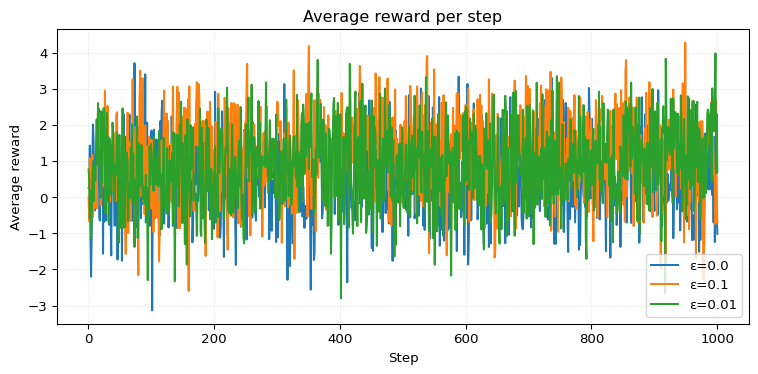

In [7]:
# experiment with only one run
epsilons = [0.0, 0.1, 0.01]
agents = [SampleAverageBanditAgent(Q1=np.zeros(10), ε=ε, seed=seed) for ε in epsilons]
avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    exp_steps=1_000,
    exp_runs=1,
    exp_seed=seed,
)

plot_average_reward(avg_rwd, labels=[f"ε={e}" for e in epsilons])
plt.tight_layout()
plt.show()

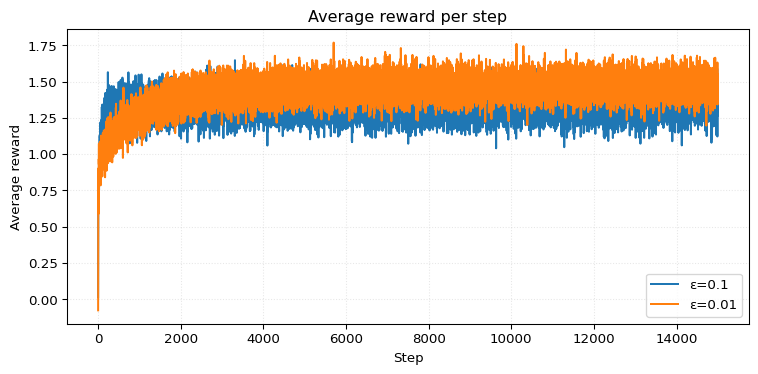

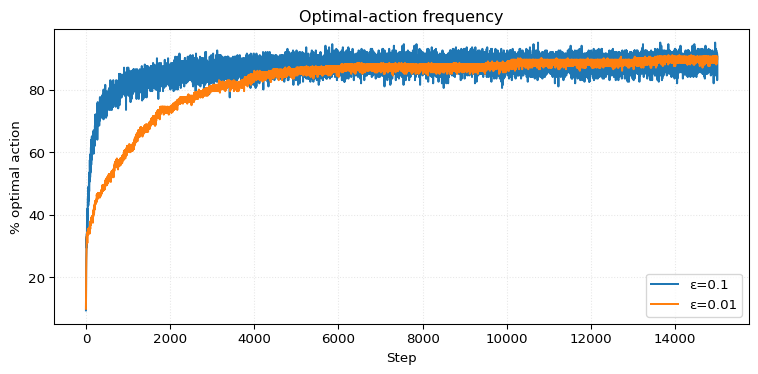

In [8]:
# | layout-ncol: 2
# battle betwee ε=0.1 and ε=0.01
epsilons = [0.1, 0.01]
agents = [SampleAverageBanditAgent(Q1=np.zeros(10), ε=ε, seed=seed) for ε in epsilons]
avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    exp_steps=15_000,
    exp_runs=200,
    exp_seed=seed,
)

plot_average_reward(avg_rwd, labels=[f"ε={e}" for e in epsilons])
plt.tight_layout()
plt.show()

plot_optimal_action_percent(opt_pct, labels=[f"ε={e}" for e in epsilons])
plt.tight_layout()
plt.show()

In [9]:
#| code-fold: false
#| eval: false
Q[action] += α * (reward - Q[action])

In [10]:
# | code-fold: false
# the constant step bandit agent
class ConstantStepBanditAgent:
    def __init__(self, Q1, α, ε, seed=None):
        self.rng = np.random.default_rng(seed)
        self.num_actions = len(Q1)
        self.Q1 = Q1
        self.α = α
        self.ε = ε
        self.reset()

    def reset(self):
        self.Q = self.Q1.copy()

    def act(self, bandit):
        # ε-greedy action selection
        if self.rng.random() < self.ε:
            action = self.rng.integers(self.num_actions)
        else:
            action = np.argmax(self.Q)

        # take action
        reward = bandit.pull_arm(action)

        # Update count and value estimate
        self.Q[action] += self.α * (reward - self.Q[action])

        return (action, reward)

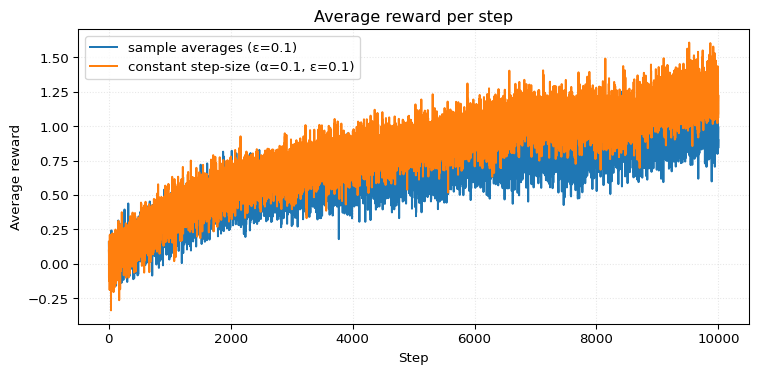

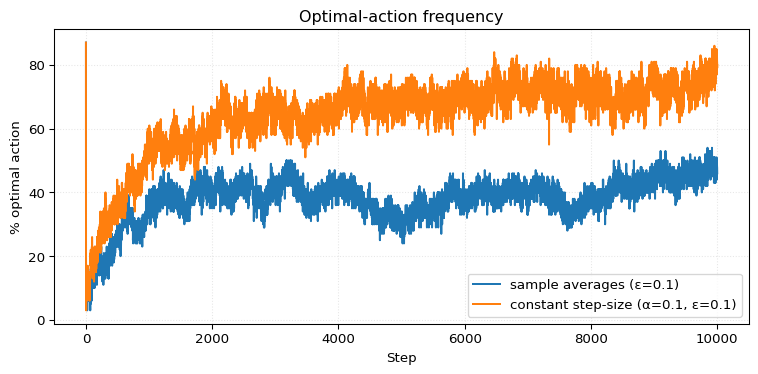

In [11]:
# | layout-ncol: 2
# battle between sample average and constant step
agent0 = SampleAverageBanditAgent(Q1=np.zeros(num_arms, dtype=float), ε=0.1, seed=seed)
agent1 = ConstantStepBanditAgent(
    Q1=np.zeros(num_arms, dtype=float), α=0.1, ε=0.1, seed=seed
)
agents = [agent0, agent1]
avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    bandit_setup_mu=0,
    bandit_setup_sd=0,
    bandit_value_drift=True,
    bandit_value_drift_mu=0,
    bandit_value_drift_sd=0.01,
    exp_steps=10_000,
    exp_runs=100,
    exp_seed=seed,
)

labels = ["sample averages (ε=0.1)", "constant step-size (α=0.1, ε=0.1)"]
plot_average_reward(avg_rwd, labels=labels)
plt.tight_layout()
plt.show()

plot_optimal_action_percent(opt_pct, labels=labels)
plt.tight_layout()
plt.show()

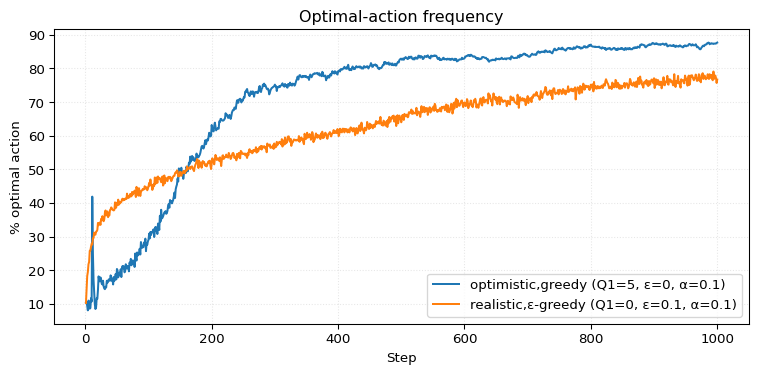

In [12]:
#| label: fig-bandit-comparison-optimism
#| fig-cap: 'This is like Figure 2.3 in the book: The effect of optimistic initial action-value estimates.'
# realism vs optimism
agent_optimistic_greedy = ConstantStepBanditAgent(
    Q1=np.full(num_arms, 5.0, dtype=float), α=0.1, ε=0.0, seed=seed
)
agent_realistic_ε_greedy = ConstantStepBanditAgent(
    Q1=np.zeros(num_arms, dtype=float), α=0.1, ε=0.1, seed=seed
)

agents = [agent_optimistic_greedy, agent_realistic_ε_greedy]
avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    exp_steps=1_000,
    exp_runs=1_000,
    exp_seed=seed,
)

labels = [
    "optimistic,greedy (Q1=5, ε=0, α=0.1)",
    "realistic,ε-greedy (Q1=0, ε=0.1, α=0.1)",
]
plot_optimal_action_percent(opt_pct, labels=labels)
plt.tight_layout()
plt.show()

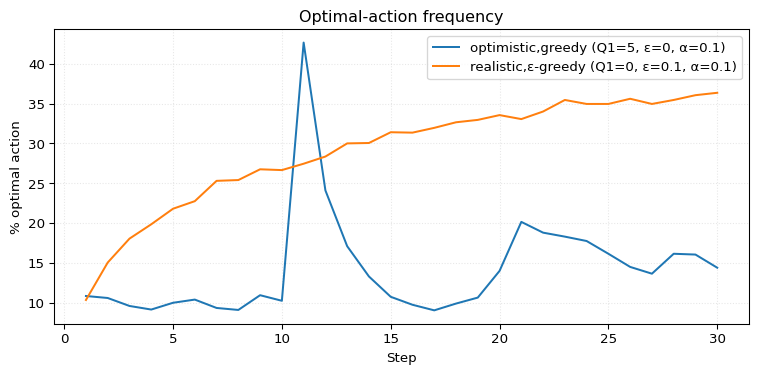

In [13]:
# realism vs optimism zoomed in
agent_optimistic_greedy = ConstantStepBanditAgent(
    Q1=np.full(num_arms, 5.0, dtype=float), α=0.1, ε=0.0, seed=seed
)
agent_realistic_ε_greedy = ConstantStepBanditAgent(
    Q1=np.zeros(num_arms, dtype=float), α=0.1, ε=0.1, seed=seed
)

agents = [agent_optimistic_greedy, agent_realistic_ε_greedy]
avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    exp_steps=30,
    exp_runs=2_000,
    exp_seed=seed,
)

labels = [
    "optimistic,greedy (Q1=5, ε=0, α=0.1)",
    "realistic,ε-greedy (Q1=0, ε=0.1, α=0.1)",
]
plot_optimal_action_percent(opt_pct, labels=labels)
plt.tight_layout()
plt.show()

In [14]:
# | code-fold: false
# the ucb bandit agent
class UcbBanditAgent:
    def __init__(self, num_actions, c, seed=None):
        self.num_actions = num_actions
        self.c = c  # exploration parameter
        self.reset()
        self.rng = np.random.default_rng(seed)

    def reset(self):
        self.t = 0
        self.Q = np.zeros(self.num_actions, dtype=float)
        self.counts = np.zeros(self.num_actions, dtype=int)

    def act(self, bandit):
        self.t += 1

        # upper-Confidence-Bound Action Selection
        if self.t <= self.num_actions:
            # if not all actions have been tried yet, select an untried action
            action = self._choose_untaken_action()
        else:
            # calculate UCB values for each action
            ucb_values = self.Q + self.c * np.sqrt(np.log(self.t) / (self.counts))
            # select the action with the highest UCB value
            action = np.argmax(ucb_values)

        # take action and observe the reward
        reward = bandit.pull_arm(action)

        # update count and value estimate
        self.counts[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.counts[action]

        return (action, reward)

    def _choose_untaken_action(self):
        return self.rng.choice(np.where(self.counts == 0)[0])

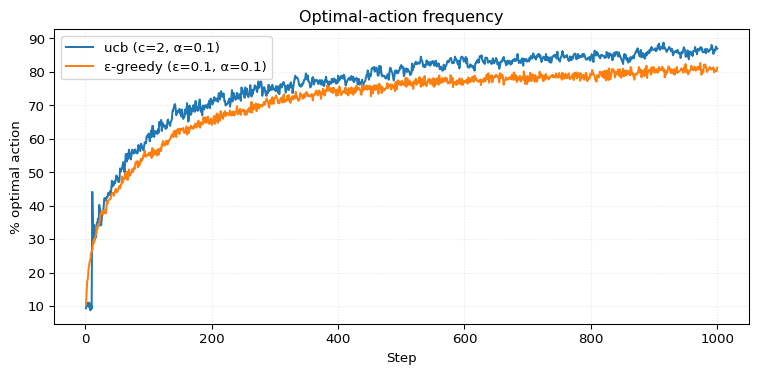

In [15]:
#| label: fig-bandit-ucb-performance
#| fig-cap: 'This is like Figure 2.4 in the book: Average performance of UCB action selection.'
# ucb agent performance
agent_ucb = UcbBanditAgent(num_actions=num_arms, c=2, seed=seed)
agent_ε_greedy = SampleAverageBanditAgent(
    Q1=np.zeros(num_arms, dtype=float), ε=0.1, seed=None
)

agents = [agent_ucb, agent_ε_greedy]

avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    exp_steps=1_000,
    exp_runs=1_000,
    exp_seed=seed,
)

labels = [
    "ucb (c=2, α=0.1)",
    "ε-greedy (ε=0.1, α=0.1)",
]
plot_optimal_action_percent(opt_pct, labels=labels)
plt.tight_layout()
plt.show()

In [16]:
# | code-fold: false
# the gradient agent
class GradientBanditAgent:
    def __init__(self, H1, α, seed=None):
        self.num_actions = len(H1)  # number of actions (arms)
        self.α = α  # step size
        self.H1 = np.asarray(H1, dtype=np.float64)  # initial preferences
        self.reset()  # initialize preferences, average rewards, and counts
        self.rng = np.random.default_rng(seed)

    def reset(self):
        self.H = self.H1.copy()  # preferences
        self.avg_reward = 0  # average rewards
        self.t = 0  # step count

    def act(self, bandit):
        self.t += 1

        # select action using softmax
        action_probs = GradientBanditAgent.softmax(self.H)
        action = self.rng.choice(self.num_actions, p=action_probs)

        # take action and observe the reward
        reward = bandit.pull_arm(action)

        # update average reward
        self.avg_reward += (reward - self.avg_reward) / self.t

        # update action preferences
        baseline = reward - self.avg_reward
        one_hot_action = np.eye(self.num_actions)[action]
        self.H += self.α * baseline * (one_hot_action - action_probs)

        return action, reward

    @staticmethod
    def softmax(x):
        # shift vector by max(x) to avoid hughe numbers.
        # This is basically using the fact that softmax(x) = softmax(x + C)
        exp_x = np.exp(x - np.max(x))
        return exp_x / np.sum(exp_x)

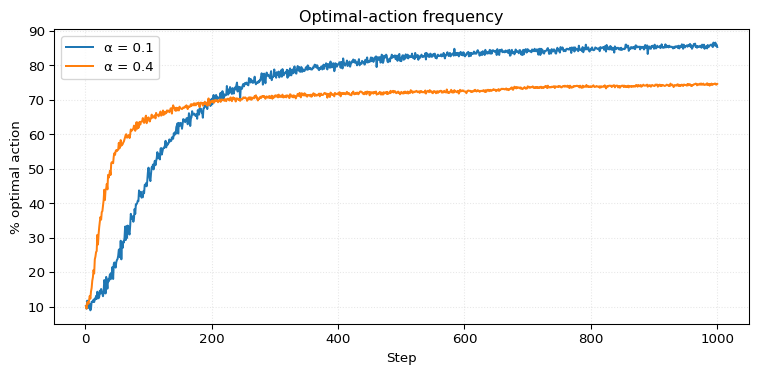

In [17]:
#| label: fig-gardiet-bandit-performance
#| fig-cap: 'This is like Figure 2.5 in the book: Average performance of the gradient bandit algorithm. Except that we only show the variants with baseline'
# gradinet bandit performance
alphas = [0.1, 0.4]
agents = [GradientBanditAgent(H1=np.zeros(num_arms), α=α, seed=seed) for α in alphas]

avg_rwd, opt_pct = bandit_experiment(
    agents,
    bandit_num_arms=num_arms,
    exp_steps=1_000,
    exp_runs=1_000,
    exp_seed=seed,
)

labels = [f"α = {α}" for α in alphas]
plot_optimal_action_percent(opt_pct, labels=labels)
plt.tight_layout()
plt.show()

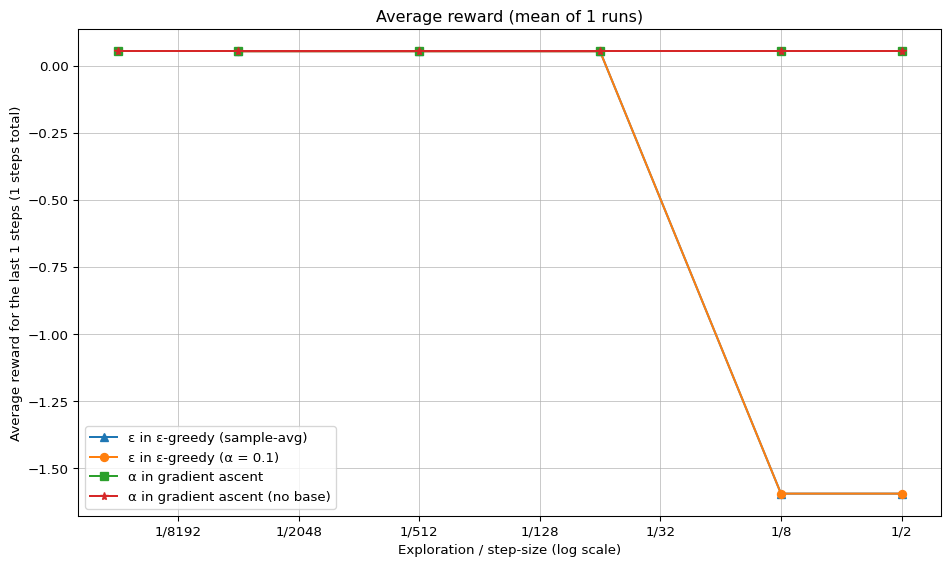

In [18]:
# | fig-cap: "A parameter sweep like in 2.6 for a non-stationary bandit. For each parameter we did 200 episodes of lenght 300,000 and computed the average reward (but only for the last 50,000 steps of an episode). Each bandit started with all values distributed standard normally and drifts the means of this distribution with normally with sd = 0.1"
# === Parameter sweep for nonstationary bandit
"""
We compare 4 bandit agents:
0 - ε-greedy sample-average, parameter = ε
1 - ε-greedy constant α = 0.1, parameter = ε
2 - Gradient ascent with baseline, parameter = α
3 - Gradient ascent no baseline, parameter = α
"""
from functools import partial
from matplotlib.ticker import FuncFormatter

import numpy as np
import matplotlib.pyplot as plt

# custom import
from scripts.parameter_study.episode_mean import episode_mean

# --- Global config
CONFIG = dict(
    seed=0,
    num_arms=10,
    steps=1,
    keep=1,
    runs=1,
    drift_sd=0.1,
)

AGENTS = {
    "ε in ε-greedy (sample-avg)": dict(
        id=0,
        x_name="ε",
        x_vals=[2**-k for k in (12, 9, 6, 3, 1)],
        fixed=dict(),
    ),
    "ε in ε-greedy (α = 0.1)": dict(
        id=1,
        x_name="ε",
        x_vals=[2**-k for k in (12, 9, 6, 3, 1)],
        fixed=dict(α=0.1),
    ),
    "α in gradient ascent": dict(
        id=2,
        x_name="α",
        x_vals=[2**-k for k in (14, 12, 9, 6, 3, 1)],
        fixed=dict(),
    ),
    "α in gradient ascent (no base)": dict(
        id=3,
        x_name="α",
        x_vals=[2**-k for k in (14, 12, 9, 6, 3, 1)],
        fixed=dict(),
    ),
}


# --- Experiment helper
def evaluate(agent_type: int, **kwargs) -> float:
    """Mean reward over the last *keep* steps averaged across *runs* runs."""
    args = {**CONFIG, **kwargs}
    rng = np.random.default_rng(args["seed"])
    seeds = rng.integers(0, 2_000_000, size=args["runs"])

    rewards = [
        episode_mean(
            agent_type,
            args["num_arms"],
            args["steps"],
            args["keep"],
            0,  # bandit_action_mu
            1,  # bandit_action_sd
            0,  # drift_mu
            args["drift_sd"],
            seed,
            kwargs.get("ε", 0.1),
            kwargs.get("α", 0.1),
        )
        for seed in seeds
    ]
    return float(np.mean(rewards))


# --- run the sweeps
results = {}
for label, spec in AGENTS.items():
    run = partial(evaluate, spec["id"], **spec["fixed"])
    results[label] = [run(**{spec["x_name"]: x}) for x in spec["x_vals"]]

# --- plot
fig, ax = plt.subplots(figsize=(10, 6))

markers = ["^", "o", "s", "*"]  # one per agent
for (label, spec), marker in zip(AGENTS.items(), markers):
    ax.plot(
        spec["x_vals"],
        results[label],
        marker=marker,
        label=label,
    )

ax.set_xscale("log", base=2)
ax.set_xlabel("Exploration / step-size (log scale)")
ax.set_ylabel(
    f"Average reward for the last {CONFIG['keep']:,} steps ({CONFIG['steps']:,} steps total)"
)
ax.set_title(f"Average reward (mean of {CONFIG['runs']} runs)")
ax.grid(True, which="both", linewidth=0.5)

ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"1/{int(1/x)}" if x < 1 else str(int(x)))
)

ax.legend()
fig.tight_layout()

plt.show()